<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

#  EDA TERM-1 PROJECT - FAST FOOD RESTAURANTS DATASET

## Table of Contents

1. [Problem Statement](#problem_statement)
2. [Data Loading and Description](#data_loading)

3. [Data Profiling](#data_profiling)
    - 3.1 [Understanding the Dataset](#data_understanding)<br/>
    - 3.2 [Pre Profiling](#pre_profiling)<br/>
        -  [Initial Observations](#initial_obs)<br/>
    - 3.3 [Data_Normalization](#normalization)<br/>
    - 3.4 [Preprocessing](#preprocessing)<br/>
    - 3.5 [Post Profiling](#post_profiling)<br/>
    
4. [Analysis and Observations in the data](#observations)<br/>
    - 4.1 [US Provinces with total number of restaurants located there?](#section401)<br/>
    - 4.2 [Top 10 US States with highest number of food chains](#section402)<br/>
    - 4.3 [Which part of the US has more number of restaurants?](#section403)<br/>
    - 4.4 [Food chain with largest number of restaurants in US](#section404)<br/>
    - 4.5 [Wordcloud depiction of all the fast food chains in US](#section405)<br/>
    - 4.6 [Different fast food chain distribution amongst different states in US](#section406)<br/>
    - 4.7 [Top 5 US Cities with top 3 famous fast food restaurant chains located there](#section407)<br/>

5. [Conclusions](#conclusions)<br/>  

<a id='#problem_statement'></a>

### 1. Problem Statement

This notebook does the exploratory data analysis of the data for fast food restaurants in US for INSAID EDA Project.

<a id='#data_loading'></a>

### 2. Data Loading and Description

This dataset is a list of 10,000 fast food restaurants from Datafiniti's Business Database updated between April 2018 and June 2018. 

Attribute details:
- __address:__ address of the restaurant
- __city:__ city it is located in
- __country:__ country it is located in ('US' for all)
- __keys:__ unique field
- __latitude:__ geographical latitude position of the restaurant
- __longitude:__ geographical longitude position of the restaurant
- __name:__ name of the restaurant chain
- __postalCode:__ postal code of the restaurant
- __province:__ province it is located in
- __websites:__ websites available for the restaurant


#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install us                                      # Package to work with US and state metadata 
import us
#!pip install folium                                  # Package to visualize geospatial data
import folium
from folium import plugins
#!pip install wordcloud                               # Package for visual representation of text data
from wordcloud import WordCloud

#### Importing the Dataset 

In [2]:
restaurants = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv")

<a id='#data_profiling'></a>

## 3. Data Profiling 

<a id='#data_understanding'></a>

### 3.1 Understanding the dataset 

In [3]:
restaurants.shape

(10000, 10)

In [4]:
restaurants.columns

Index(['address', 'city', 'country', 'keys', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'websites'],
      dtype='object')

In [5]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
address       10000 non-null object
city          10000 non-null object
country       10000 non-null object
keys          10000 non-null object
latitude      10000 non-null float64
longitude     10000 non-null float64
name          10000 non-null object
postalCode    10000 non-null object
province      10000 non-null object
websites      9535 non-null object
dtypes: float64(2), object(8)
memory usage: 781.3+ KB


In [6]:
restaurants.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [7]:
restaurants.describe(include = 'all') 

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,515 E Main St,Cincinnati,US,us/in/northmanchester/1702indiana114/-1161002137,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN



- _From this, we see that there is just 1 unique country, which is, __"US"__. So, we can conclude that this is a US fast food restaurants data, and hence, the country field can be ignored._


In [8]:
restaurants.isnull().sum()

address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode      0
province        0
websites      465
dtype: int64


- _From this, we see that there are __465__ null records for __"websites"__ which we'll need to handle._


<a id='#pre_profiling'></a>

### 3.2 Pre Profiling and Initial Observations

In [9]:
profile = pandas_profiling.ProfileReport(restaurants)
profile.to_file(outputfile="restaurants_before_preprocessing.html")

<a id='#initial_obs'></a>

### Initial Observations:
- Most of the fields are categorical.
- __latitude__ and __longitude__ are the only numerical fields, but these pertain to the geographical features.
- __Country__ has a constant value __'US'__, which means that the dataset pertains to US and the field can be ignored.
- __Name__ has different variations of values for the same restaurant. We need to standardize these. 
    - For example, A&W has names like 'A & W Family Restaurant', 'A&W', 'A&W All American Food', 'A&W All-American Food', 'A&W All-American Foods', 'A&W Restaurant', 'A&W/Long John Silvers')
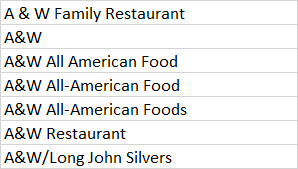


- __Websites__ field has __4.6% (465 records)__ missing values. We need to investigate and try to fill those.
- __Keys__ is the unique field in the dataset.

<a id='#normalization'></a>

### 3.3 Data Normalization 

- __Standardize all column headers to lower case__

In [9]:
restaurants.columns = map(str.lower, restaurants.columns)
restaurants.columns

Index(['address', 'city', 'country', 'keys', 'latitude', 'longitude', 'name',
       'postalcode', 'province', 'websites'],
      dtype='object')

<a id='#preprocessing'></a>

### 3.4 Preprocessing 

- _Renaming fields which are potential keywords:_
    - ___name___
    - ___keys___
    

In [10]:
restaurants = restaurants.rename(columns = {"name": "restaurant_name", 
                                  "keys":"data_key"}) 

- _Dropping __Country__ field as it is unique throughout the dataset and not required_

In [11]:
restaurants.country.unique()
print("The fast food restaurant is for countries: {}".format(set(restaurants['country'])))

The fast food restaurant is for countries: {'US'}


In [12]:
restaurants = restaurants.drop(['country'], axis=1)

- _Adding a new field <strong>"State"</strong> with State name derived from <strong>Province</strong>_

In [13]:
restaurants.province.unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'OK', 'IN', 'NC', 'TN', 'TX', 'LA',
       'KS', 'ND', 'UT', 'GA', 'NM', 'OR', 'HI', 'VT', 'MI', 'MO', 'WI',
       'WA', 'MS', 'NE', 'ME', 'MN', 'AL', 'IA', 'WV', 'AZ', 'SD', 'WY',
       'IL', 'VA', 'FL', 'CA', 'MT', 'ID', 'PA', 'RI', 'NV', 'NJ', 'MA',
       'MD', 'CO', 'NH', 'CT', 'AK', 'DE', 'DC', 'Co Spgs'], dtype=object)

In [14]:
# 'Co Spgs' is not a province 2-character code, so assigning a valid province 'CO'

for (row, col) in restaurants.iterrows():
    if (col.province) == 'Co Spgs':
        restaurants['province'].replace(to_replace=col.province, value='CO', inplace=True)

In [15]:
restaurants.province.unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'OK', 'IN', 'NC', 'TN', 'TX', 'LA',
       'KS', 'ND', 'UT', 'GA', 'NM', 'OR', 'HI', 'VT', 'MI', 'MO', 'WI',
       'WA', 'MS', 'NE', 'ME', 'MN', 'AL', 'IA', 'WV', 'AZ', 'SD', 'WY',
       'IL', 'VA', 'FL', 'CA', 'MT', 'ID', 'PA', 'RI', 'NV', 'NJ', 'MA',
       'MD', 'CO', 'NH', 'CT', 'AK', 'DE', 'DC'], dtype=object)

In [16]:
# using lambda function to assign the states derived from provinces using "lookup" function from the "us" package  

restaurants['state'] = restaurants.province.map(lambda x: us.states.lookup(x).name)
restaurants.state.unique()

array(['New York', 'Ohio', 'Kentucky', 'South Carolina', 'Arkansas',
       'Oklahoma', 'Indiana', 'North Carolina', 'Tennessee', 'Texas',
       'Louisiana', 'Kansas', 'North Dakota', 'Utah', 'Georgia',
       'New Mexico', 'Oregon', 'Hawaii', 'Vermont', 'Michigan',
       'Missouri', 'Wisconsin', 'Washington', 'Mississippi', 'Nebraska',
       'Maine', 'Minnesota', 'Alabama', 'Iowa', 'West Virginia',
       'Arizona', 'South Dakota', 'Wyoming', 'Illinois', 'Virginia',
       'Florida', 'California', 'Montana', 'Idaho', 'Pennsylvania',
       'Rhode Island', 'Nevada', 'New Jersey', 'Massachusetts',
       'Maryland', 'Colorado', 'New Hampshire', 'Connecticut', 'Alaska',
       'Delaware', 'District of Columbia'], dtype=object)

In [18]:
restaurants[['province','state']]

,province,state
0,NY,New York
1,OH,Ohio
2,KY,Kentucky
3,NY,New York
4,OH,Ohio
5,OH,Ohio
6,OH,Ohio
7,SC,South Carolina
8,SC,South Carolina
9,AR,Arkansas


- _Standardizing the __"restaurant name"__ field values_

In [19]:
rest_count = restaurants.groupby(['restaurant_name'])['restaurant_name'].count().sort_values(ascending=False).head(20)
rest_count

restaurant_name
McDonald's                               1886
Burger King                              1154
Taco Bell                                 873
Wendy's                                   731
Arby's                                    518
KFC                                       421
Domino's Pizza                            345
Subway                                    322
SONIC Drive In                            226
Hardee's                                  192
Jack in the Box                           187
Jimmy John's                              157
Pizza Hut                                 128
Bojangles' Famous Chicken 'n Biscuits     126
Sonic Drive-In                            126
McDonalds                                 111
Chick-fil-A                               100
Five Guys                                  96
Dairy Queen                                92
Whataburger                                88
Name: restaurant_name, dtype: int64

- _In this dataset, we see that the __name__: __"McDonald's"__ and __"McDonalds"__ are being considered differently, so we need to standardize the restaurant names._

__Counts taken before Standardizing the Restaurant names__

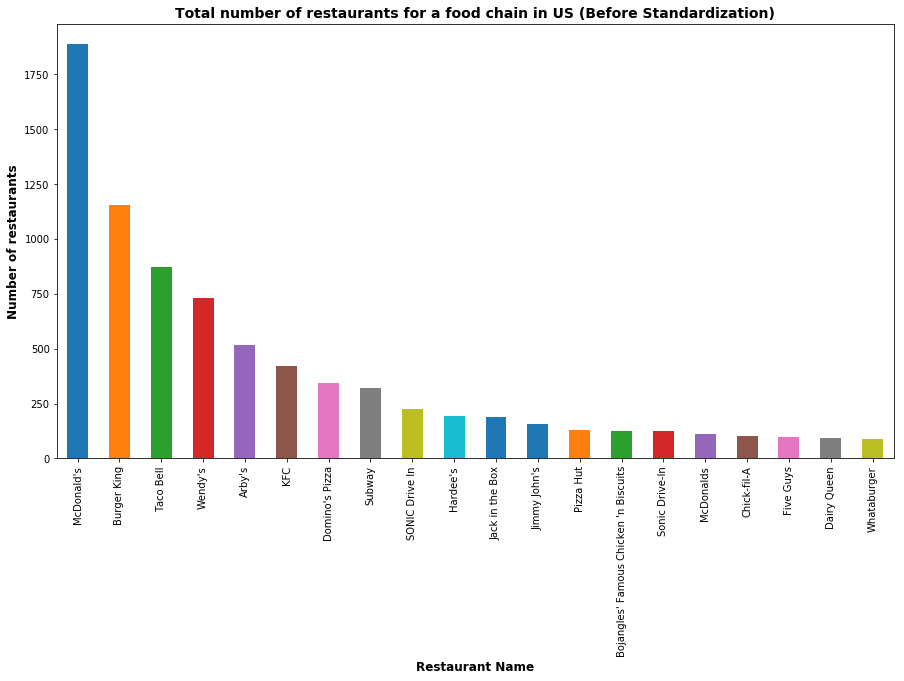

In [20]:
fig,ax =plt.subplots(figsize=(15,8))
rest_count.plot.bar().set_title("Total number of restaurants for a food chain in US (Before Standardization)", fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Name', fontsize=12, fontweight='bold')
plt.ylabel('Number of restaurants', fontsize=12, fontweight='bold')
plt.show()

- __Observation:__
    - __In this dataset, we see that the "name": "McDonald's" and "McDonalds" are being considered differently, so we need to standardize the restaurant names.__
    - __Similarly, "SONIC Drive In" and "Sonic Drive-In" are considered as different fast food chains.__

#### Standardizing different names of the same food chain restaurant 

In [21]:
# Creating different name groups for same restaurant chain

seleven_str = ["7-11", "7-Eleven"]
aw_str = ["A & W Family Restaurant", "A&W", 'A&w', "A&W All American Food", "A&W All-American Food", "A&W All-American Foods", "A&W Restaurant", "A&w Restaurant", "A&W/Long John Silvers", "Aw Restaurant"]
arbys_str = ["Arbys", "Arby's", "Arby's Antigo"]
burger_str = ['Burger King', 'Burger King Salou', 'B K']
carl_str = ["Carl's / Green Burrito", "Carls Jr", "Carl's Jr", "Carl's Jr - Green Burrito", "Carl's Jr / Green Burrito", "Carl's Jr.", "Carls Jr. / Green Burrito", "Carl's Jr. / Green Burrito", "Dual - Carls / Grn Burrito 1100654"]
checkers_str = ["Checkers", "Checker's", "Checkers Burgers and Fries", "Checker's Drive-in Restaurant", "Checker's Hamburgers"]
chickfill_str = ["Chick-fil-A", "Chick-Fil-A", "Chick-fil-a", "Chick-fil-a Magnolia Mall", "Chick-fil-a Orange Avenue", "Chick-fil-a Superstition Springs Center", "Chick-fil-a Truett's Luau"]
dominos_str = ["Dominos Pizza", "Domino's Pizza"]
dunkin_str = ["Dunkin Donuts", "Dunkin' Donuts"]
hardees_str = ["Hardees", "Hardee's", "Hardee's / Red Burrito", "Hardee's / Red Burrito / Dough Boys"]
jack_str = ['Jack in the Box', 'Jack In The Box']
jimmy_str = ["Jimmy Johns", "Jimmy John's", "Jimmy John's Gourmet Sandwiches"]
kfc_str = ["Kentucky Fried Chicken", "KFC", "Kfc", "KFC - Kentucky Fried Chicken", "Kfc - Kentucky Fried Chicken", "KFC / A&W", "KFC / Taco Bell", "KFC/Taco Bell"]
longjohn_str = ["Long John Silver/ A&W", "Long John Silvers", "Long John Silver's", "Long John Silvers / A&W", "Long John Silver's / A&W"]
mcd_str = ["Mc Donalds", "Mc Donald's", "McDonald’s", "McDonaldâ€™s", "McDonalds", "Mcdonalds", "McDonald's", "Mcdonald's", "Mcdonald's - Walmart", "Flash Foods / McDonald's", 
"Mcdonald's #25557", "McDonalds @ Old Atlanta", "McDonald's of Mililani Mauka"]
popeye_str = ["Popeyes", "Popeye's", "Popeye's Chicken", "Popeyes Chicken & Biscuits", "Popeye's Chicken & Biscuits", "Popeyes Chicken and Biscuits", "Popeyes Louisiana Kitchen", "Popeye's Louisiana Kitchen"]
sonic_str = ["Sonic", "SONIC Drive In", "Sonic Drive In", "Sonic Drive in", "SONIC Drive-In", "Sonic Drive-in", "Sonic Drive-In", "Sonic Drive-in (trailer)"]
subway_str = ["Subway", "Subway - Bell's Ferry", "SUBWAY", "SUBWAY®", "Subway - Roland Park", "Subway (johnson) @ Jonesboro", "Subway Citgo of Quarryville", "Subway Guitars", "Subway Sandwiches", "Subway Sandwiches and Salads", "SUBWAYÂ®"]
taco_str = ['Taco Bell', 'Taco Bell/Pizza Hut Express']
wendy_str = ["Wendys", "Wendy's", 'Wendy Two Two Eight']

# Replacing different strings for the same restaurant chain with a standardized name

for (row, col) in restaurants.iterrows():
    if (col.restaurant_name) in seleven_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value='7-Eleven', inplace=True)
    if (col.restaurant_name) in aw_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value='A&W', inplace=True)
    if (col.restaurant_name) in arbys_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Arby's", inplace=True)
    if (col.restaurant_name) in burger_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value='Burger King', inplace=True)
    if (col.restaurant_name) in carl_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Carl's Jr", inplace=True)
    if (col.restaurant_name) in checkers_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Checker's", inplace=True)
    if (col.restaurant_name) in chickfill_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Chick-Fil-A", inplace=True)
    if (col.restaurant_name) in dominos_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Domino's Pizza", inplace=True)
    if (col.restaurant_name) in dunkin_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Dunkin' Donuts", inplace=True)
    if (col.restaurant_name) in hardees_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Hardee's", inplace=True)
    if (col.restaurant_name) in jack_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Jack in the Box", inplace=True)
    if (col.restaurant_name) in jimmy_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Jimmy John's", inplace=True)
    if (col.restaurant_name) in kfc_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="KFC", inplace=True)
    if (col.restaurant_name) in longjohn_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Long John Silver's", inplace=True)
    if (col.restaurant_name) in mcd_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="McDonald's", inplace=True)
    if (col.restaurant_name) in popeye_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Popeye's", inplace=True)
    if (col.restaurant_name) in sonic_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Sonic", inplace=True)
    if (col.restaurant_name) in subway_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Subway", inplace=True)
    if (col.restaurant_name) in taco_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value='Taco Bell', inplace=True)
    if (col.restaurant_name) in wendy_str:
        restaurants['restaurant_name'].replace(to_replace=col.restaurant_name, value="Wendy's", inplace=True)


In [22]:
rest_count = restaurants.groupby(['restaurant_name'])['restaurant_name'].count().sort_values(ascending=False).head(20)
rest_count

restaurant_name
McDonald's                               2121
Burger King                              1156
Taco Bell                                 874
Wendy's                                   735
Arby's                                    521
KFC                                       457
Subway                                    413
Sonic                                     399
Domino's Pizza                            359
Hardee's                                  214
Jack in the Box                           201
Jimmy John's                              164
Chick-Fil-A                               150
Pizza Hut                                 128
Bojangles' Famous Chicken 'n Biscuits     126
Carl's Jr                                 101
Five Guys                                  96
Dairy Queen                                92
Whataburger                                88
Taco John's                                77
Name: restaurant_name, dtype: int64

__Counts taken after Standardizing the Restaurant names__

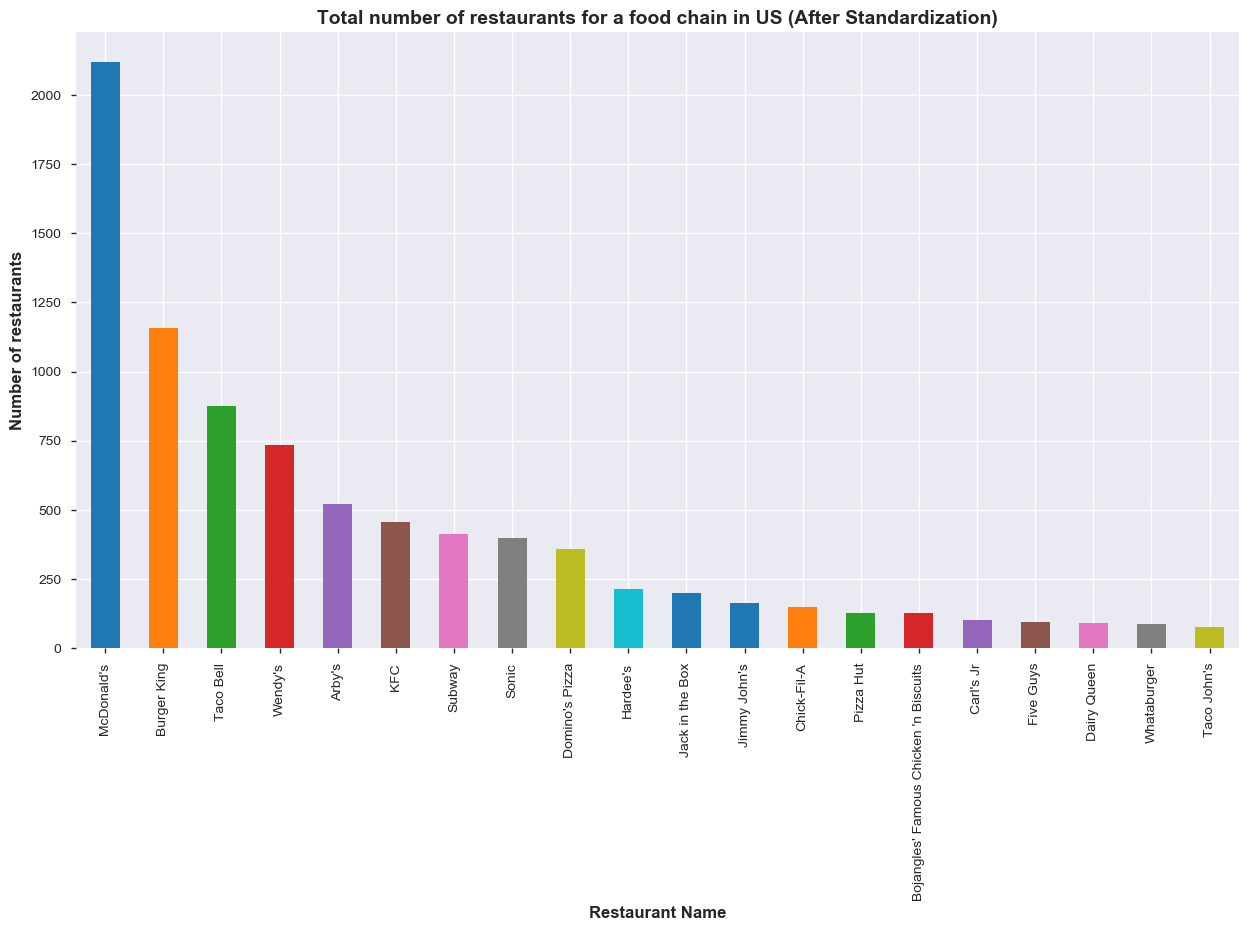

In [23]:
fig,ax =plt.subplots(figsize=(15,8))
rest_count.plot.bar().set_title("Total number of restaurants for a food chain in US (After Standardization)", fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Name', fontsize=12, fontweight='bold')
plt.ylabel('Number of restaurants', fontsize=12, fontweight='bold')
plt.show()

- __Observation:__
    - Here, we see that standardizing the __Restaurant names__ made such a huge impact on the number of restaurants.
        - For eg., number of <strong>McDonald's</strong> restaurants increased from <strong>1886</strong> to <strong>2121</strong> and <strong>Sonic</strong> from <strong>226</strong> to <strong>399</strong>.

#### Treating missing __"websites"__ values

In [24]:
restaurants[restaurants.websites.isnull()].shape

(465, 10)

In [25]:
# Top 20 Restaurants with number of website values specified

name = restaurants.loc[:, ['restaurant_name','websites']]
grouped = name.groupby('restaurant_name')
grouped['websites'].agg(['count']).sort_values(by='count', ascending=False).head(20)

,count
restaurant_name,
McDonald's,2068
Burger King,1120
Taco Bell,856
Wendy's,722
Arby's,512
KFC,425
Sonic,391
Subway,388
Domino's Pizza,358


In [26]:
missing_data = restaurants[restaurants.websites.isnull()]
missing_data.head()

,address,city,data_key,latitude,longitude,restaurant_name,postalcode,province,websites,state
37,218 W Main St,Ada,us/ok/ada/218wmainst/-1173852384,34.774820,-96.681260,Hamburger King,74820,OK,NaN,Oklahoma
137,161 Church St,Burlington,us/vt/burlington/161churchst/-1600724499,44.475680,-73.212640,Pacific Rim,5401,VT,NaN,Vermont
262,3596 MT Diablo Blvd,Lafayette,us/ca/lafayette/3596mtdiabloblvd/-1322134216,37.891487,-122.123350,Baja Fresh,94549,CA,NaN,California
292,309 S Pearson Rd.,Pearl,us/al/pearl/309spearsonrd./1082608893,32.269050,-90.135680,Waffle House,39208,AL,NaN,Alabama
303,6466 Poplar Ave,Memphis,us/tn/memphis/6466poplarave/126846685,35.099798,-89.848067,Back Yard Burgers,38119,TN,NaN,Tennessee


- _Writing a function to assign __"mode"__ value of websites for a restaurant where the __website__ is missing._

In [27]:
def websites_mode(restaurants, restaurant_name, websites):
    """
      Function to assign mode value of websites for the restaurant names where the website is missing 
    """
    return (restaurants.groupby(restaurant_name + [websites]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=restaurant_name)).drop(columns='counts')

restaurants.loc[restaurants.websites.isnull(), 'websites'] = restaurants.restaurant_name.map(websites_mode(restaurants, ['restaurant_name'], 'websites').set_index('restaurant_name').websites)

In [28]:
restaurants[restaurants.websites.isnull()].shape

(102, 10)


_So, we reduced the number of missing __websites__ values from __465__ to __102__._

<a id='#post_profiling'></a>

### 3.5 Post Profiling 

In [29]:
profile = pandas_profiling.ProfileReport(restaurants)
profile.to_file(outputfile="restaurants_after_preprocessing.html")

<a id='#final_obs'></a>

### Final Observations:
- Most of the fields are categorical.
- __latitude__ and __longitude__ are the only numerical fields, but these pertain to the geographical features. So, some geographical visualizations can be done using these fields.
- The ambiguous field __country__ is removed from the dataset.
- Total Missing % of data got dropped from __0.5%__ to __0.1%__.
- Distinct __Name__ of restaurants decreased to __460__ as opposed to __548__ after standardization of top 20 restaurant chains. 
- The missing values of __Websites__ field reduced from __4.6% (465 records)__ to __1.0% (102 records)__.
- __Keys__ is the unique field in the dataset.

<a id='#observations'></a>

## 4. Analysis and Observations

<a id='#section401'></a>

### 4.1 US Provinces with total number of restaurants located there:

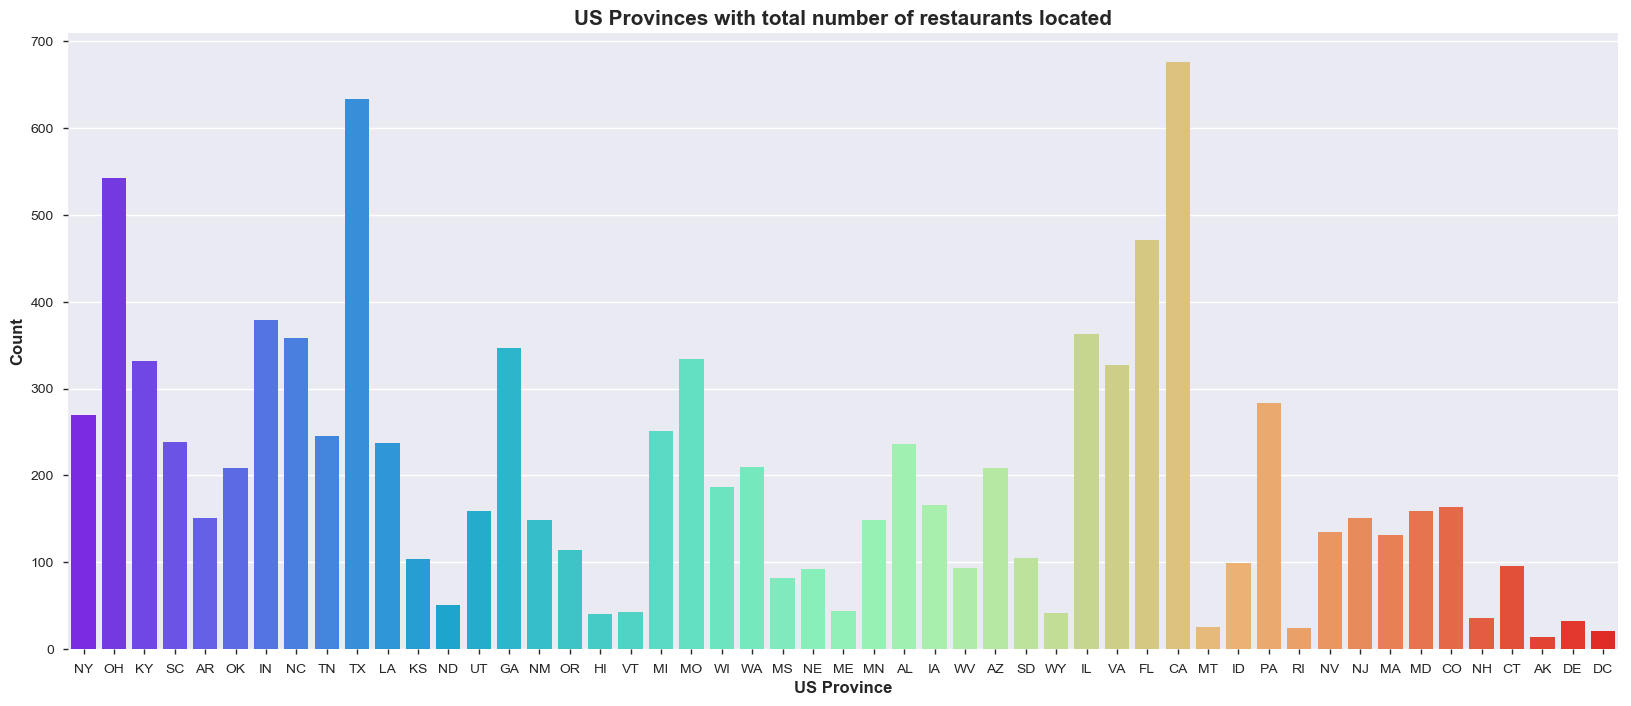

In [30]:
fig,ax =plt.subplots(figsize=(20,8))
sns.countplot(data = restaurants, x='province', palette='rainbow')
plt.title('US Provinces with total number of restaurants located', fontsize=15, fontweight='bold')
plt.xlabel('US Province', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

- __Observation: CA has the maximum number of restaurants, followed by TX, OH and FL.__

<a id='#section402'></a>

### 4.2 Top 10 US States with highest number of food chains:

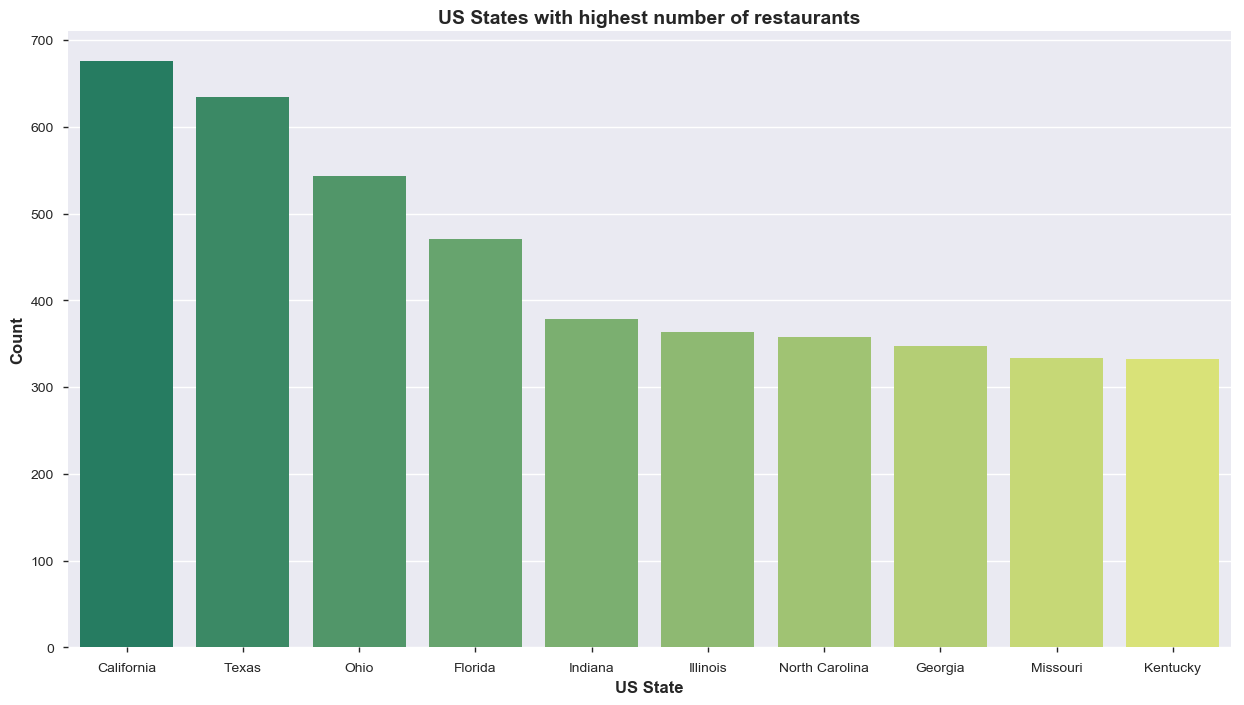

In [31]:
fig,ax =plt.subplots(figsize=(15,8))
sns.countplot(data = restaurants, x='state', order= restaurants['state'].value_counts().head(10).index, palette='summer')
plt.title('US States with highest number of restaurants', fontsize=14, fontweight='bold')
plt.xlabel('US State', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

- __Observation:__
    - __California has the maximum number of restaurants, followed by Texas, Ohio and Florida.__
    - __Indiana, Illinois, North Carolina, Georgia, Missouri and Kentucky are quite comparable.__

<a id='#section403'></a>

### 4.3 Which part of the US has more number of restaurants?

In [32]:
map_data = restaurants.loc[:,['latitude', 'longitude']]
map_data = map_data.round(2)
coordinates_arr = restaurants[['latitude', 'longitude']]#.as_matrix()
map_F = folium.Map(location = [map_data['latitude'].mean(), map_data['longitude'].mean()], zoom_start = 4)
map_F.add_child(plugins.HeatMap(coordinates_arr, radius=15))
map_F

- __Observation:__
    - __States in the East coast of US have more number of restaurants than other parts of the country.__
    - __California is the only state in West coast that has a considerable number of fast food chain restaurants. Rest of the states which are in top 10 list lie towards the East coast (Texas, Ohio, Florida, Indiana, Illinois, North Carolina, Georgia, Missouri and Kentucky).__

<a id='#section404'></a>

### 4.4 Food chain with largest number of restaurants in US:

In [33]:
name_rest = restaurants.loc[:, ['restaurant_name','websites']]
grouped_rest = name_rest.groupby('restaurant_name')
top_rest = grouped['restaurant_name'].agg(['count']).sort_values(by='count', ascending=False).head(10).reset_index().restaurant_name
rest_copy = restaurants.copy()
rest_copy['rest_five'] = rest_copy.restaurant_name.map(lambda x: x if x in list(top_rest.head(5)) else 'Others')
rest_copy

,address,city,data_key,latitude,longitude,restaurant_name,postalcode,province,websites,state,rest_five
0,324 Main St,Massena,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York,McDonald's
1,530 Clinton Ave,Washington Court House,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com,Ohio,Wendy's
2,408 Market Square Dr,Maysville,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",Kentucky,Others
3,6098 State Highway 37,Massena,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York,McDonald's
4,139 Columbus Rd,Athens,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",Ohio,Others
5,4182 Tonya Trl,Hamilton,us/oh/hamilton/4182tonyatrl/-1055723171,39.417600,-84.476410,Domino's Pizza,45011,OH,"https://www.dominos.com/en/?redirect=homepage,...",Ohio,Others
6,590 S Main St,Englewood,us/oh/englewood/590smainst/-1055723171,39.869690,-84.293580,Domino's Pizza,45322,OH,https://www.dominos.com/en/?redirect=homepagea...,Ohio,Others
7,401 N Jennings St,Saluda,us/sc/saluda/401njenningsst/-1161002137,34.005980,-81.770400,McDonald's,29138,SC,http://www.mcdonalds.com,South Carolina,McDonald's
8,205 W Church St,Batesburg,us/sc/batesburg/205wchurchst/-791445730,33.913350,-81.533300,Wendy's,29006,SC,http://www.wendys.com,South Carolina,Wendy's
9,2711 W. Kings Highway Ste. 18,Paragould,us/ar/paragould/2711wkingshighwayste18/-66712705,36.061070,-90.523250,Pizza Hut,72450,AR,http://www.pizzahut.com,Arkansas,Others


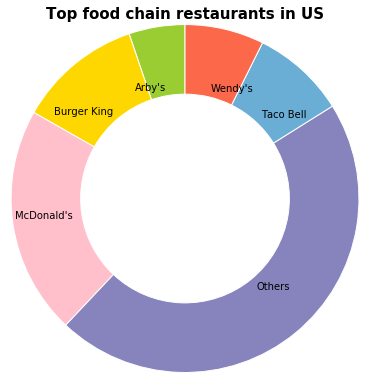

In [34]:
rest_cat = rest_copy.groupby('rest_five')['restaurant_name'].count()
group_names = rest_cat.index
group_size = rest_cat.values
#ax.axis('equal')
fig, ax = plt.subplots()
mypie, _ = ax.pie(group_size, radius=2, labels=group_names, startangle=90,  labeldistance=0.65, colors = ['yellowgreen', 'gold','pink',plt.cm.Purples(0.6),plt.cm.Blues(0.5),plt.cm.Reds(0.5)])
plt.setp(mypie, width=0.8, edgecolor='white')
plt.title('Top food chain restaurants in US', size=15, fontweight='bold', y=1.3)
plt.show()

- __Observation: "McDonald's", "Burger King", "Taco Bell", "Wendy's" and "Arby's" constitute to more than 50% of all the restaurants in the US.__

<a id='#section405'></a>

### 4.5 Wordcloud depiction of all the fast food chains in US:

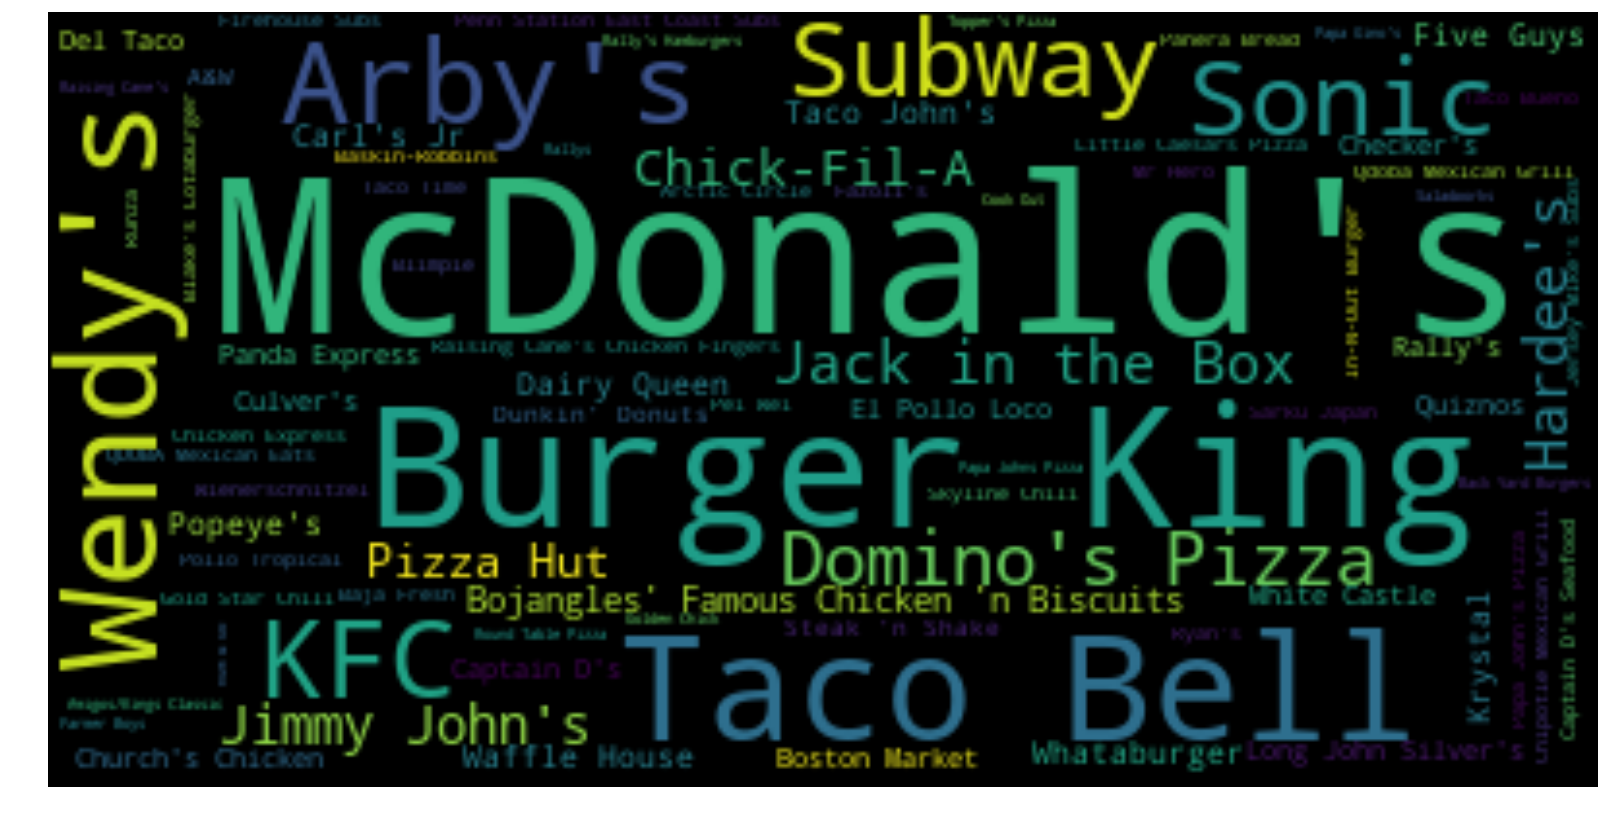

In [34]:
wordcloud = WordCloud().generate_from_frequencies(restaurants['restaurant_name'].value_counts())
fig = plt.figure(1,figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- __Observation: "McDonald's" is the most popular fast food chain in US, followed by "Burger King", "Taco Bell" and "Wendy's".__

<a id='#section406'></a>

### 4.6 Different fast food chain distribution amongst different states in US:

In [35]:
name_rest = restaurants.loc[:, ['restaurant_name','websites']]
grouped_rest = name_rest.groupby('restaurant_name')
top_rest = grouped['restaurant_name'].agg(['count']).sort_values(by='count', ascending=False).head(10).reset_index().restaurant_name
name_state = restaurants.loc[:, ['state','restaurant_name']]
grouped_state = name_state.groupby('state')
top_state = grouped_state['state'].agg(['count']).sort_values(by='count', ascending=False).head(10).reset_index().state
relation = pd.crosstab(restaurants[restaurants.state.isin(top_state)].state, restaurants[restaurants.restaurant_name.isin(top_rest)].restaurant_name)
relation

restaurant_name,Arby's,Burger King,Domino's Pizza,Hardee's,KFC,McDonald's,Sonic,Subway,Taco Bell,Wendy's
state,,,,,,,,,,
California,3,58,16,0,24,134,3,39,70,26
Florida,7,92,21,9,36,95,7,19,24,36
Georgia,15,42,13,11,14,64,10,13,26,32
Illinois,8,56,8,15,17,83,3,18,48,22
Indiana,44,43,9,12,25,85,3,4,49,44
Kentucky,33,21,8,10,12,77,9,10,31,36
Missouri,18,16,8,12,9,78,40,11,43,20
North Carolina,27,25,8,18,15,79,12,7,37,37
Ohio,48,73,5,6,27,119,5,2,53,70


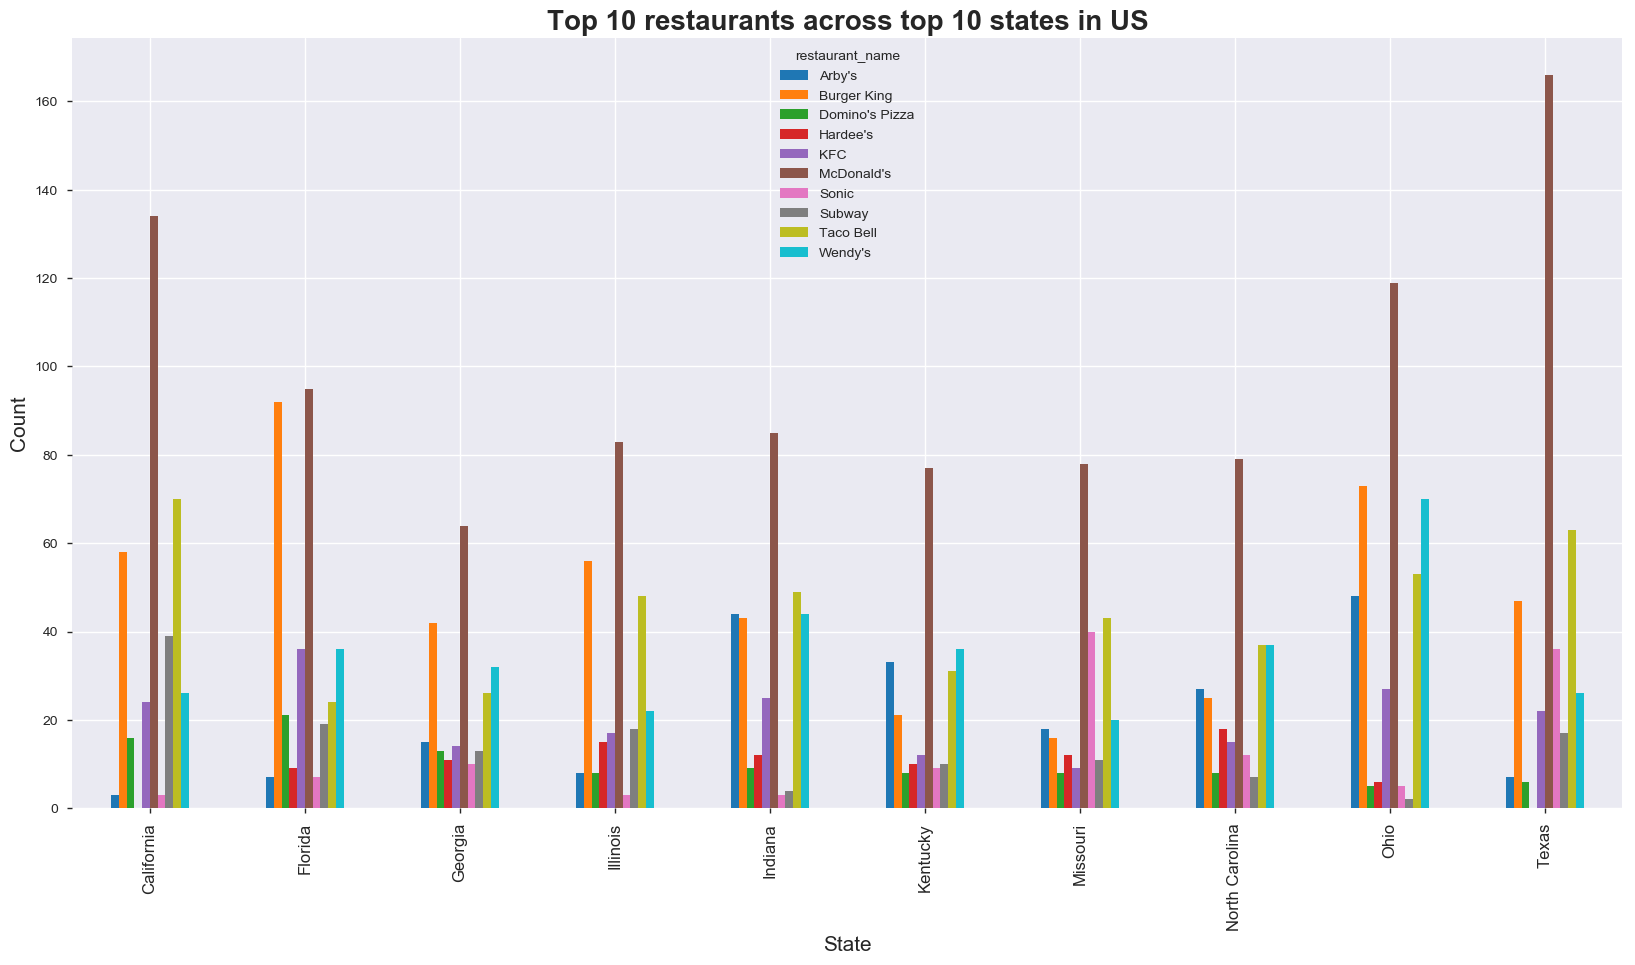

In [36]:
relation.plot.bar(figsize=(20,10))
plt.xticks(size = 12)
plt.yticks(size = 10)
plt.xlabel('State', size=15)
plt.ylabel('Count', size=15)
plt.title('Top 10 restaurants across top 10 states in US',size=20, fontweight='bold')
plt.show()

- __Observation:__
    - __As seen in an earlier section, California has more number of restaurants than Texas, but Texas has the highest number of McDonald's.__
    - __Similarly, Florida has the highest number of Burger King restaurants, followed by Ohio and California.__

<a id='#section407'></a>

### 4.7 Top 5 US Cities with top 3 famous fast food restaurant chains located there:

In [37]:
top_rest = grouped['restaurant_name'].agg(['count']).sort_values(by='count', ascending=False).head(3).reset_index().restaurant_name
name_city = restaurants.loc[:, ['city','restaurant_name']]
grouped_city = name_city.groupby('city')
top_city = grouped_city['city'].agg(['count']).sort_values(by='count', ascending=False).head(5).reset_index().city
relation_city = pd.crosstab(restaurants[restaurants.city.isin(top_city)].city, restaurants[restaurants.restaurant_name.isin(top_rest)].restaurant_name)
relation_city

restaurant_name,Burger King,McDonald's,Taco Bell
city,,,
Cincinnati,12,20,13
Denver,9,7,4
Houston,7,12,5
Las Vegas,2,10,2
Miami,19,6,1


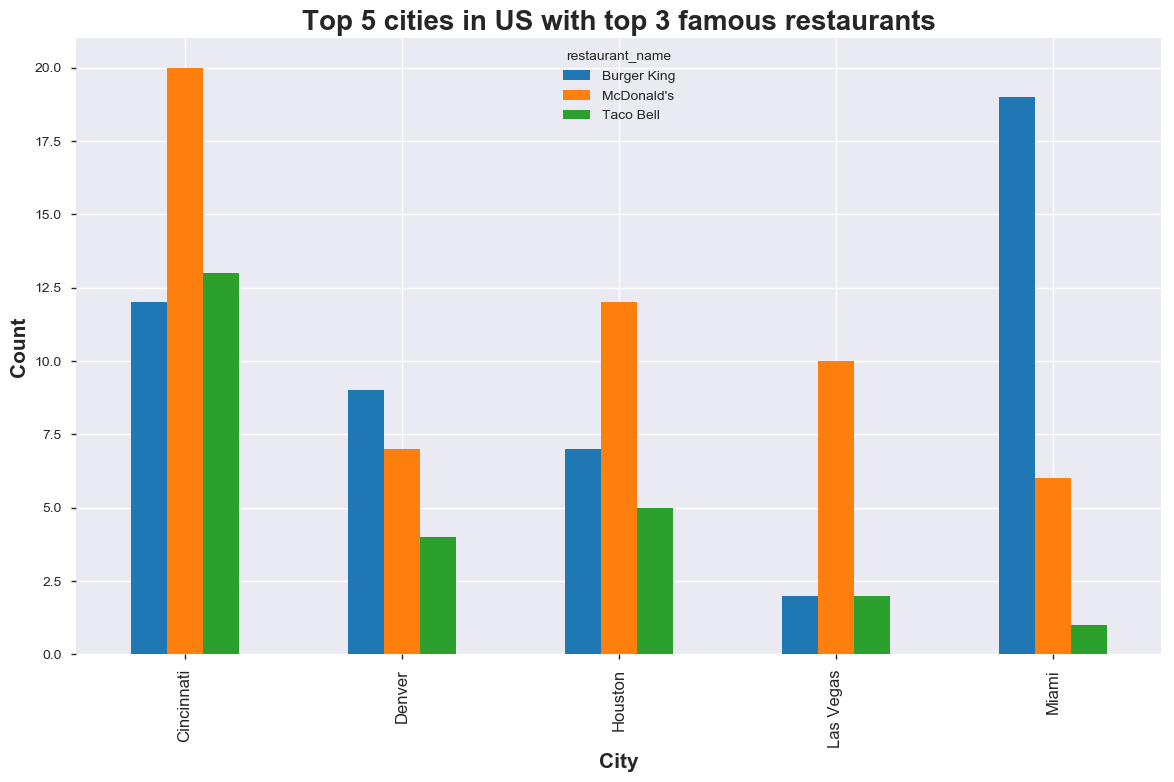

In [38]:
relation_city.plot.bar(figsize=(14,8))
plt.xticks(size = 12)
plt.yticks(size = 10)
plt.xlabel('City', fontweight='bold', size=15)
plt.ylabel('Count', fontweight='bold', size=15)
plt.title('Top 5 cities in US with top 3 famous restaurants',size=20, fontweight='bold')
plt.show()

- __Observations:__
    - __In Cincinnati, McDonald's is most famous, while in Miami Burger King is way more famous than McDonald's or Taco Bell.__
    - __In Houston and Las Vegas too, McDonald's is more famous, whereas Taco Bell and Burger King restaurants are similar in number.__

<a id='#conclusions'></a>

### 5. Conclusions 

- Standardization of the __Restaurant Names__ improved the data quality.
- __California has most number of restaurants__ which is far more than other states, which is followed by __Texas, Ohio__ and __Florida__.
    - Number of restaurants in __Indiana, Illinois, North Carolina, Georgia, Missouri__ and __Kentucky__ are quite comparable.
- States in the __East coast of US have more number of restaurants__ than other parts of the country.
    - __California__ is the only state in __West coast__ that has a considerable number of fast food chain restaurants. __Washington__ has an average number of restaurants.
    - Rest of the states which are in top 10 list lie towards the East coast (Texas, Ohio, Florida, Indiana, Illinois, North Carolina, Georgia, Missouri and Kentucky).
- __McDonald's is the most popular fast food chain__ in US, followed by __Burger King, Taco Bell__ and __Wendy's__.
- __McDonald's, Burger King, Taco Bell, Wendy's__ and __Arby's constitute to more than 50% of all the restaurants in the US__.
- __California__ has more number of restaurants than __Texas__ in total, but __Texas has the highest number of McDonald's__.
- Similarly, __Florida has the highest number of Burger King__ restaurants, followed by __Ohio__ and __California__.
- This concludes that, __California__ has a large number of other fast food chain restuarants as well, which are not that famous in other parts (East coast) of the country. 
- __In Cincinnati, McDonald's is most famous__, while __in Miami Burger King is way more famous than McDonald's or Taco Bell.__
- __In Houston and Las Vegas too, McDonald's is more famous__, whereas Taco Bell and Burger King restaurants are similar in number.
